Demonstrating the efficacy of Bartlett's Method and Welch's Method

In [52]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numpy.fft import fft

In [53]:
nSamples = 2**16
x = random.randn(nSamples)

# Periodogram

In [54]:
# DTFT
X = fft(x)
X_periodogram = ((np.abs(X))**2)/nSamples

w = 2*np.pi / nSamples * np.arange(nSamples)

# Bartlett's Method

In [55]:
bin_size = 128
bins = int(nSamples/bin_size)-1

X_B = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
m = 0
for k in range(bins):
    s = x[m:m+bin_size]
    Xs = fft(s)
    Xs_periodogram = (np.abs(Xs)**2) / bin_size
    X_B += Xs_periodogram
    
    m += bin_size

X_B /= bins

# Welch's Method

In [65]:
bin_size = 1024
m_inc = int(bin_size*0.5)
bins = int(nSamples / m_inc)-1

window_function = np.hamming(bin_size)
U = np.sum(window_function**2)/bin_size # average energy of the window function

X_W = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
m = 0
for k in range(bins):
    s = x[m:m+bin_size] * window_function
    Xs = fft(s)
    Xs_periodogram = (np.abs(Xs)**2) / bin_size
    X_W += Xs_periodogram
    
    m += m_inc # allow segment overlap!

X_W /= bins

In [69]:
m=0
window_function = np.hamming(bin_size)
U = np.sum(window_function**2)/bin_size
X_W = np.zeros(bin_size)
while m < nSamples-bin_size:
    s = x[m:m+bin_size]
    s1 = s*window_function
    X1 = fft(s1)
    Xs = (np.abs(X1)**2) / bin_size
    X_W += Xs
    m += m_inc

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

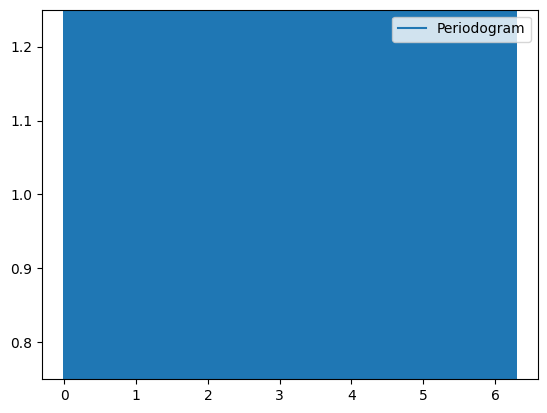

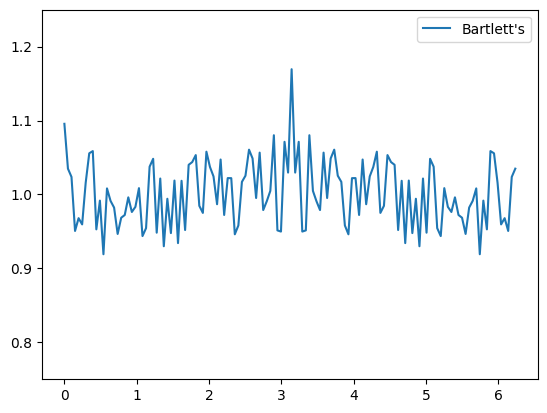

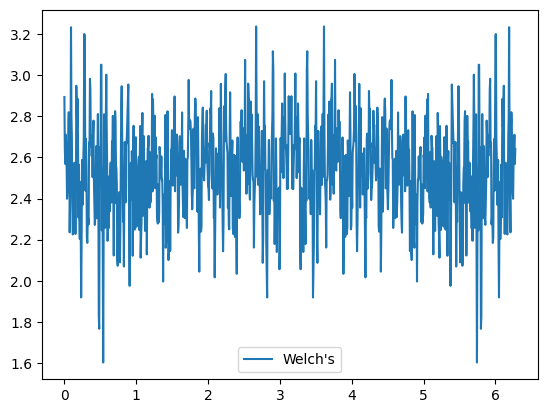

In [67]:
# Periodogram
w = 2*np.pi * np.arange(len(X_periodogram))/len(X_periodogram)
plt.plot(w,X_periodogram,label="Periodogram")
plt.ylim(0.75,1.25)
plt.legend()
plt.show()

# Bartlett's
w = 2*np.pi * np.arange(len(X_B))/len(X_B)
plt.plot(w,X_B,label="Bartlett's")
plt.ylim(0.75,1.25)
plt.legend()
plt.show()

# Welch's
w = 2*np.pi * np.arange(len(X_W))/len(X_W)
plt.plot(w,X_W,label="Welch's")
#plt.ylim(0.75,1.25)
plt.legend()
plt.show()
